<a href="https://colab.research.google.com/github/feiduobaby/good-first-issue/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

# 1 Data Prepatation

In [ ]:
!wget $'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

--2025-10-19 05:23:57--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv.2’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.002s  

2025-10-19 05:23:57 (39.3 MB/s) - ‘course_lead_scoring.csv.2’ saved [80876/80876]



In [ ]:
df = pd.read_csv('course_lead_scoring.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

for c in categorical:
    df[c] = df[c].fillna('NA')

for c in numerical:
    df[c] = df[c].fillna(0)


In [ ]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [ ]:
y_train

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [ ]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
#train_dict = df_train[categorical + ['number_of_courses_viewed']].to_dict(orient = 'records')
#train_dict = df_train[categorical + ['annual_income']].to_dict(orient = 'records')
#train_dict = df_train[categorical + ['interaction_count']].to_dict(orient='records')
#train_dict = df_train[categorical+['lead_score']].to_dict(orient = 'records')

X_train = dv.fit_transform(train_dict)

model =LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
#val_dict = df_val[categorical + ['number_of_courses_viewed']].to_dict(orient = 'records')
#val_dict = df_val[categorical + ['annual_income']].to_dict(orient= 'records')
#val_dict = df_val[categorical+['interaction_count']].to_dict(orient='records')
#val_dict = df_val[categorical+['lead_score']].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8054607508532423)

# 2 Accuracy and dummy model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_val, y_pred >= 0.5)

0.8054607508532423

In [ ]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.584
0.05 0.628
0.10 0.669
0.15 0.693
0.20 0.706
0.25 0.734
0.30 0.747
0.35 0.775
0.40 0.792
0.45 0.802
0.50 0.805
0.55 0.809
0.60 0.823
0.65 0.816
0.70 0.805
0.75 0.788
0.80 0.758
0.85 0.720
0.90 0.693
0.95 0.614
1.00 0.416


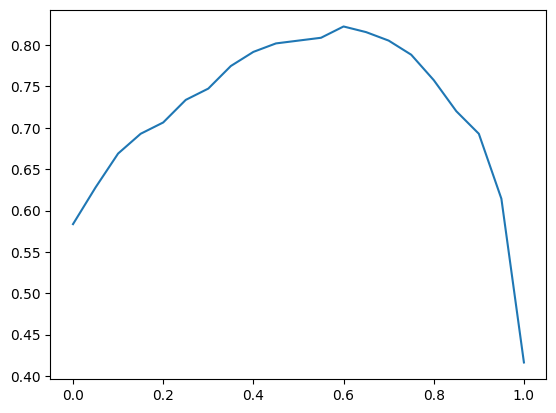

In [ ]:
plt.plot(thresholds, scores)

In [ ]:
from collections import Counter
Counter(y_pred >= 1.0)

Counter({np.False_: 293})

In [ ]:
1 - y_val.mean()

np.float64(0.41638225255972694)

# 3 Confusion Table

In [ ]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
listPR = []
for t in range(0, 100, 1):
  t = t/100.0
  predict_positive = (y_pred >= t)
  predict_negative = (y_pred < t)
  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()
  listPR.append([t,tp,tn,fp,fn])
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[122,   0],
       [150,  21]])

In [ ]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.42, 0.  ],
       [0.51, 0.07]])

In [ ]:
listPR

[[0.0, np.int64(171), np.int64(0), np.int64(122), np.int64(0)],
 [0.01, np.int64(171), np.int64(3), np.int64(119), np.int64(0)],
 [0.02, np.int64(171), np.int64(4), np.int64(118), np.int64(0)],
 [0.03, np.int64(171), np.int64(8), np.int64(114), np.int64(0)],
 [0.04, np.int64(171), np.int64(10), np.int64(112), np.int64(0)],
 [0.05, np.int64(171), np.int64(13), np.int64(109), np.int64(0)],
 [0.06, np.int64(171), np.int64(16), np.int64(106), np.int64(0)],
 [0.07, np.int64(170), np.int64(18), np.int64(104), np.int64(1)],
 [0.08, np.int64(170), np.int64(20), np.int64(102), np.int64(1)],
 [0.09, np.int64(170), np.int64(23), np.int64(99), np.int64(1)],
 [0.1, np.int64(170), np.int64(26), np.int64(96), np.int64(1)],
 [0.11, np.int64(170), np.int64(28), np.int64(94), np.int64(1)],
 [0.12, np.int64(170), np.int64(28), np.int64(94), np.int64(1)],
 [0.13, np.int64(168), np.int64(30), np.int64(92), np.int64(3)],
 [0.14, np.int64(168), np.int64(31), np.int64(91), np.int64(3)],
 [0.15, np.int64(168),

# 4 Precision and Recall

In [ ]:
p = tp / (tp + fp)
print(p)
print(tp, fp)

1.0
21 0


In [ ]:
r = tp / (tp + fn)
r

np.float64(0.12280701754385964)

In [ ]:
F1 = 0
res = 0
for item in listPR:
  p = item[1]/(item[1] + item[3])
  r = item[1]/(item[1] + item[4])
  a = 2*(p*r)/(p+r)
  print("a:",a,'t',item[0])
  if a > F1:
    res = item[0]
    F1 = a

  if p==r:
    print(item[0])
    print(p)
    print(r)
print(res)

a: 0.7370689655172414 t 0.0
a: 0.7418655097613882 t 0.01
a: 0.7434782608695651 t 0.02
a: 0.7499999999999999 t 0.03
a: 0.7533039647577092 t 0.04
a: 0.7583148558758315 t 0.05
a: 0.7633928571428572 t 0.06
a: 0.7640449438202247 t 0.07
a: 0.7674943566591423 t 0.08
a: 0.7727272727272728 t 0.09
a: 0.7780320366132724 t 0.1
a: 0.7816091954022989 t 0.11
a: 0.7816091954022989 t 0.12
a: 0.7795823665893272 t 0.13
a: 0.7813953488372093 t 0.14
a: 0.7887323943661971 t 0.15
a: 0.7943262411347518 t 0.16
a: 0.7923627684964201 t 0.17
a: 0.7961630695443644 t 0.18
a: 0.7951807228915664 t 0.19
a: 0.7922705314009661 t 0.2
a: 0.7922705314009661 t 0.21
a: 0.7922705314009661 t 0.22
a: 0.7980535279805352 t 0.23
a: 0.8058968058968058 t 0.24
a: 0.8078817733990148 t 0.25
a: 0.8118811881188119 t 0.26
a: 0.813895781637717 t 0.27
a: 0.8179551122194514 t 0.28
a: 0.8179551122194514 t 0.29
a: 0.8140703517587938 t 0.3
a: 0.8202531645569621 t 0.31
a: 0.8223350253807106 t 0.32
a: 0.8223350253807106 t 0.33
a: 0.82474226804123

# 5 ROC Curves

TPR and FRP

In [ ]:
tpr = tp / (tp + fn)
tpr

In [ ]:
fpr = fp / (fp + tn)
fpr

In [ ]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

Random model

In [ ]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
((y_rand >= 0.5) == y_val).mean()

In [ ]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [ ]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

Ideal model

In [ ]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

In [ ]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

y_ideal_pred = np.linspace(0, 1, len(y_val))
1 - y_val.mean()

In [ ]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

In [ ]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

In [ ]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

Putting everything together

In [ ]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

# 6 ROC AUC

In [ ]:
from sklearn.metrics import auc
auc(fpr, tpr)

number_of_courses_viewed 0.7859745

annual_income 0.641827

interaction_count 0.758820

lead_score 0.678698

In [ ]:
auc(df_scores.fpr, df_scores.tpr)

number_of_courses_viewed 0.785519

annual_income 0.641262

interaction_count 0.759060

lead_score 0.677955

In [ ]:
auc(df_ideal.fpr, df_ideal.tpr)

number_of_courses_viewed 0.999952

annual_income 0.999952

interaction_count 0.999952

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

number_of_courses_viewed 0.7859745

annual_income 0.641837

interaction_count 0.758820

lead_score 0.678698

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

number_of_courses_viewed 0.7859745

annual_income 0.641837

interaction_count 0.758820

lead_score 0.678698

In [ ]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]
import random
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

In [ ]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

# 7 Cross-Validation

In [ ]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model
dv, model = train(df_train, y_train, C=0.001)
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred
y_pred = predict(df_val, dv, model)
from sklearn.model_selection import KFold

In [ ]:
!pip install tqdm

In [ ]:
from tqdm.auto import tqdm
n_splits = 5

#for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train, C=5)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

In [ ]:
scores

In [ ]:
dv, model = train(df_full_train, df_full_train.converted.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc